# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">Học máy và ứng dụng 📝</p>

<p style="text-align:center">
    <a href="https://github.com/ITHealer?tab=repositories" target="_blank">
    <img src="avatar_healer.jpg" width="200" alt="Logo link github"  />
    </a>
    <b>4251050044 - Ung Minh Hoài</b> <br>
</p>

## 1. Import library

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

## 2. Prepare data 

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer() 
data.keys()  

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [70]:
len(data.feature_names)

30

In [71]:
data.data.shape

(569, 30)

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

## 3. Split train/test

In [12]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3) # test_size=0.25, random_state=42

In [13]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [14]:
y_train.shape, y_test.shape

((398,), (171,))

## 3. Build model

### Mô hình KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors': [3,4,5,6,7,8,9,10]
}, cv=5, return_train_score=False)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]})

In [18]:
# pd.DataFrame(clf.cv_results_)

In [23]:
# 1. Xây dựng mô hình
model_knn = KNeighborsClassifier(n_neighbors=5)
# 2. Fit
model_knn.fit(X_train, y_train)
# 3. Độ chính xác
model_knn.score(X_test, y_test)

0.9415204678362573

In [24]:
y_pred = model_knn.predict(X_test) 
y_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0])

<AxesSubplot:>

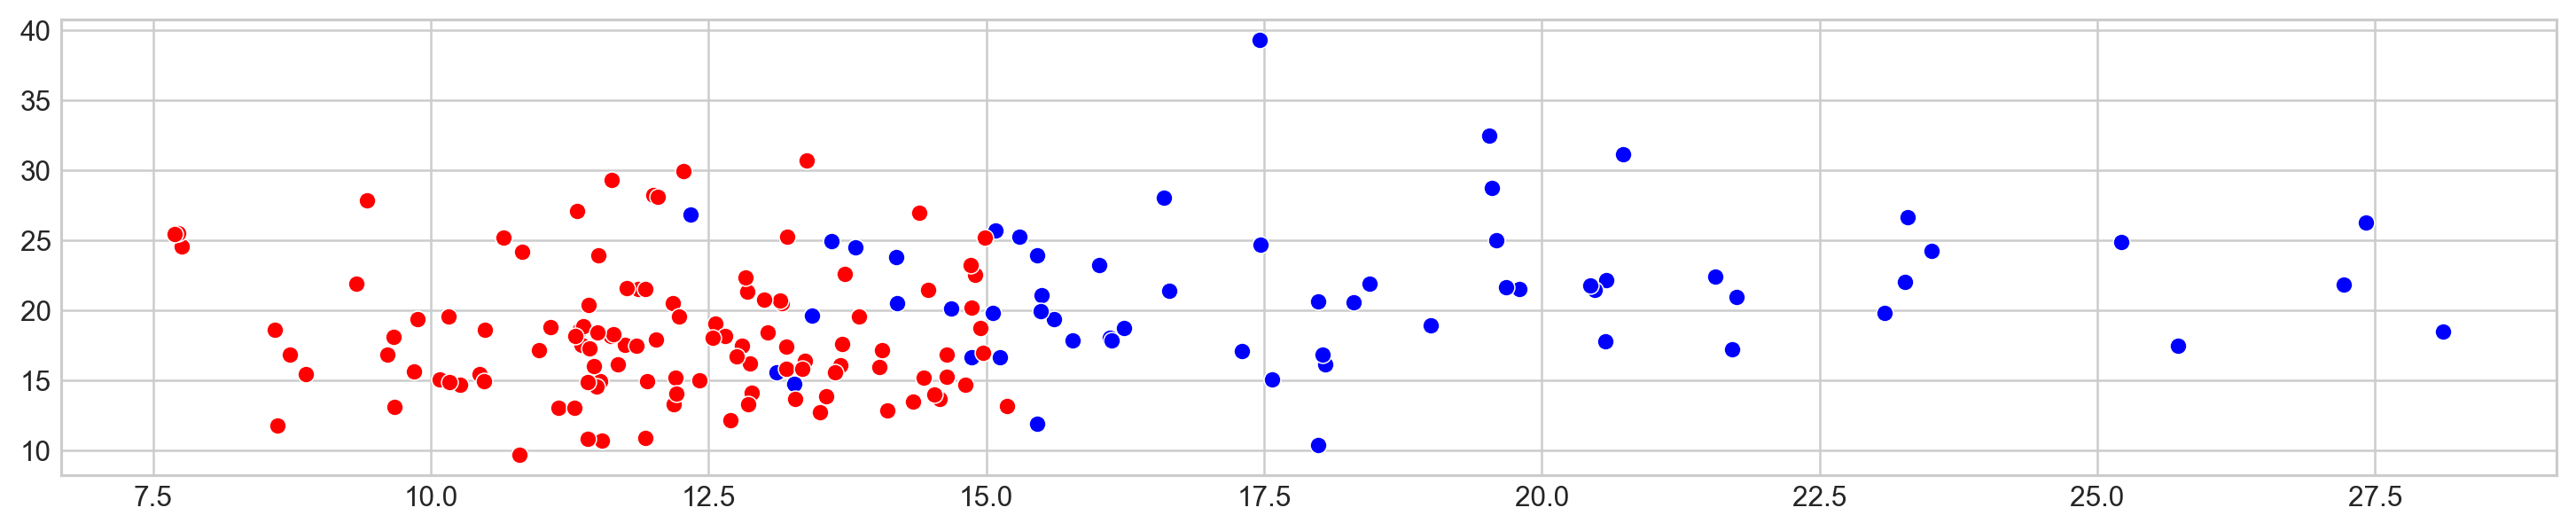

In [69]:
sns.scatterplot(X_test[y_pred==0,0], X_test[y_pred==0,1], color = 'blue')
sns.scatterplot(X_test[y_pred==1,0], X_test[y_pred==1,1], color = 'red')

## 4. Evaluation

In [28]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred = model_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 57,   8],
       [  2, 104]], dtype=int64)

## 5. Visualization

Text(42.0, 0.5, 'Gía trị thực tế')

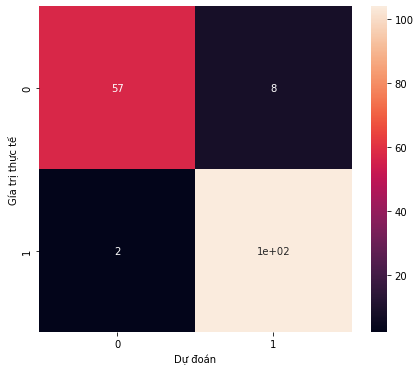

In [44]:
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True)
plt.xlabel("Dự đoán")
plt.ylabel("Gía trị thực tế")

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        65
           1       0.93      0.98      0.95       106

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



## Câu 5: Mô hình tùy chọn 

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# 1. Xây dựng mô hình
model_lr = LogisticRegression()
# 2. Fit
model_lr.fit(X_train, y_train)
# 3. Độ chính xác
model_lr.score(X_test, y_test)

0.9590643274853801

In [38]:
y_pred_lr = model.predict(X_test) 
y_pred_lr

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [46]:
y_pred_lr = model_lr.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[ 61,   4],
       [  3, 103]], dtype=int64)

Text(42.0, 0.5, 'Gía trị thực tế')

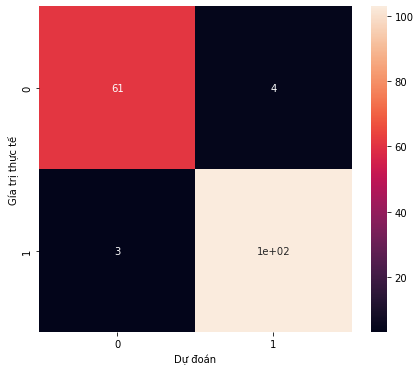

In [47]:
plt.figure(figsize=(7,6))
sns.heatmap(cm_lr, annot=True)
plt.xlabel("Dự đoán")
plt.ylabel("Gía trị thực tế")

## END